# Formula 1 - 2023 Season Analysis

### Created by MONU (monusinghsheoran)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline

In [2]:
calendar = pd.read_csv('formula1_2023season_calendar.csv')
calendar.set_index('Round', inplace=True)
drivers = pd.read_csv('formula1_2023season_drivers.csv')
drivers.set_index('Abbreviation', inplace=True)
raceResults = pd.read_csv('formula1_2023season_raceResults.csv')

### 2023 Season Race Calendar


In [3]:
calendar[['GP Name', 'City', 'Country', 'Circuit Name', 'Race Date', 'Circuit Length(km)', 'Number of Laps']]

,GP Name,City,Country,Circuit Name,Race Date,Circuit Length(km),Number of Laps
Round,,,,,,,
1,Gulf Air Bahrain GP,Sakhir,Bahrain,Bahrain International Circuit,5/3/2023,5.412,57
2,STC Saudi Arabian GP,Jeddah,Saudi Arabia,Jeddah Corniche Circuit,19/03/2023,6.174,50
3,Rolex Australian GP,Melbourne,Australia,Melbourne Grand Prix Circuit,2/4/2023,5.278,58
4,Azerbaijan GP,Baku,Azerbaijan,Baku City Circuit,30/04/2023,6.003,51
5,Crypto.com Miami GP,Miami,United States,Miami International Autodrome,7/5/2023,5.412,57
6,Qatar Airways Gran Premio Del Made In Italy e ...,Imola,Italy,Autodromo Enzo e Dino Ferrari,21/5/2023,4.909,63
7,Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,28/05/2023,3.337,78
8,AWS Gran Premio de España,Catalunya,Spain,Circuit de Barcelona-Catalunya,4/6/2023,4.657,66
9,Pirelli Grand Prix du Canada,Montréal,Canada,Circuit Gilles-Villeneuve,18/06/2023,4.361,70


### 2023 Season Drivers

In [4]:
drivers[['No', 'Driver', 'Team', 'Country', 'Date of Birth', 'Place of Birth', 
         'Grands Prix Entered', 'Highest Race Finish']]

,No,Driver,Team,Country,Date of Birth,Place of Birth,Grands Prix Entered,Highest Race Finish
Abbreviation,,,,,,,,
VER,1,Max Verstappen,Red Bull Racing,Netherlands,30/09/1997,"Hasselt, Belgium",185,1(x54)
PER,11,Sergio Perez,Red Bull Racing,Mexico,26/01/1990,"Guadalajara, Mexico",258,1(x6)
HAM,44,Lewis Hamilton,Mercedes,United Kingdom,07/01/1985,"Stevenage, England",332,1(x103)
ALO,14,Fernando Alonso,Aston Martin,Spain,29/07/1981,"Oviedo, Spain",380,1(x32)
LEC,16,Charles Leclerc,Ferrari,Monaco,16/10/1997,"Monte Carlo, Monaco",125,1(x5)
NOR,4,Lando Norris,McLaren,United Kingdom,13/11/1999,"Bristol, England",104,2(x7)
SAI,55,Carlos Sainz,Ferrari,Sapin,01/09/1994,"Madrid, Spain",185,1(x2)
RUS,63,George Russell,Mercedes,United Kingdom,15/02/1998,"King's Lynn, England",104,1(x1)
PIA,81,Oscar Piastri,McLaren,Australia,06/04/2001,"Melbourne, Victoria",22,2(x1)


In [5]:
def assign_color(val_type,values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','RAI','GIO']:         cl.append('#960000')
        elif abbr in ['HAAS','GRO','MAG','FIT']: cl.append('#787878')
        elif abbr in ['RACI','PER','STR','HUL']: cl.append('#f595c8')
        elif abbr in ['WILL','RUS','LAT','AIT']: cl.append('#0082fa')
        elif abbr in ['ALPH','GAS','KVY']:       cl.append('#ffffff')
        elif abbr in ['MCLA','SAI','NOR']:       cl.append('#ff8700')
        elif abbr in ['RED ','VER','ALB']:       cl.append('#0600f0')
        elif abbr in ['FERR','LEC','VET']:       cl.append('#cb0000')
        elif abbr in ['MERC','HAM','BOT']:       cl.append('#00d2b5')
        elif abbr in ['RENA','RIC','OCO']:       cl.append('#fff500')
    return cl

# Highlights of the 2023 Formula 1 Season: A Year of Thrilling Races
The 2023 Formula 1 season has been a rollercoaster of emotions, filled with breathtaking performances and unforgettable moments. Here are the highlights from six standout races that defined the season:


## Results of Several Notable Races in 2023 Season

### BAHRAIN - A Grand Opening Under the Lights
**Key Moment**: Max Verstappen's dominant performance set the tone for the season.

The season kicked off in Bahrain, where Verstappen showcased the raw power of Red Bull Racing. Fans were treated to a night filled with high-speed drama, as he finished well ahead of the competition, signaling Red Bull's intent for the championship.


In [6]:
raceResults[raceResults['Track'] == 'Bahrain'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,1:36.344
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,1:36.156
4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,1:37.130
5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,1:36.546
6,18,Lance Stroll,Aston Martin Aramco Mercedes,8,57,+54.502,8,No,1:36.546
7,63,George Russell,Mercedes,6,57,+55.873,6,No,1:37.221
8,77,Valtteri Bottas,Alfa Romeo Ferrari,12,57,+72.647,4,No,1:37.379
9,10,Pierre Gasly,Alpine Renault,20,57,+73.753,2,No,1:35.068


### SAUDI ARABIA - Perez's Impressive Victory
**Key Moment**: Sergio Perez executed a flawless race strategy to clinch victory.

In Jeddah, Perez shone brightly, starting from the front row and navigating the challenging street circuit with skill. His win highlighted the fierce competition within the Red Bull team, leaving fans buzzing with excitement.


In [7]:
raceResults[raceResults['Track'] == 'Saudi Arabia'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,1:21:14.894,25,No,1:32.188
2,1,Max Verstappen,Red Bull Racing Honda RBPT,15,50,+5.335,19,Yes,1:31.906
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,50,+20.728,15,No,1:32.240
4,63,George Russell,Mercedes,3,50,+25.866,12,No,1:32.433
5,44,Lewis Hamilton,Mercedes,7,50,+31.065,10,No,1:32.941
6,55,Carlos Sainz,Ferrari,4,50,+35.876,8,No,1:32.822
7,16,Charles Leclerc,Ferrari,12,50,+43.162,6,No,1:33.056
8,31,Esteban Ocon,Alpine Renault,6,50,+52.832,4,No,1:33.222
9,10,Pierre Gasly,Alpine Renault,9,50,+54.747,2,No,1:33.392


### AUSTRALIA - Hamilton's Masterful Comeback
**Key Moment**: Lewis Hamilton’s daring overtakes led him to a stunning victory.

The Australian GP saw Hamilton battle from mid-field to reclaim the top spot, executing a series of impressive maneuvers. The Melbourne crowd erupted as he crossed the finish line, reaffirming his status as a fan favorite and a racing legend.


In [8]:
raceResults[raceResults['Track'] == 'Australia'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,2:32:28.371,25,No,1:20.342
2,44,Lewis Hamilton,Mercedes,3,58,+0.179,18,No,1:20.613
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,4,58,+0.769,15,No,1:20.476
4,18,Lance Stroll,Aston Martin Aramco Mercedes,6,58,+3.082,12,No,1:20.934
5,11,Sergio Perez,Red Bull Racing Honda RBPT,20,58,+3.320,11,Yes,1:20.235
6,4,Lando Norris,McLaren Mercedes,13,58,+3.701,8,No,1:21.173
7,27,Nico Hulkenberg,Haas Ferrari,10,58,+4.939,6,No,1:21.124
8,81,Oscar Piastri,McLaren Mercedes,16,58,+5.382,4,No,1:21.335
9,24,Guanyu Zhou,Alfa Romeo Ferrari,17,58,+5.713,2,No,1:21.819


### AZERBAIJAN - A Battle of Wills
**Key Moment**: Max Verstappen’s strategic brilliance shone in a race full of lead changes.

The Baku streets turned into a thrilling battleground, with Verstappen securing victory amidst tight corners and intense competition. The unpredictable nature of street racing kept fans on the edge of their seats throughout the event.


In [9]:
raceResults[raceResults['Track'] == 'Azerbaijan'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing Honda RBPT,3,51,1:32:42.436,25,No,1:44.589
2,1,Max Verstappen,Red Bull Racing Honda RBPT,2,51,+2.137,18,No,1:44.232
3,16,Charles Leclerc,Ferrari,1,51,+21.217,15,No,1:44.561
4,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,51,+22.024,12,No,1:44.241
5,55,Carlos Sainz,Ferrari,4,51,+45.491,10,No,1:45.175
6,44,Lewis Hamilton,Mercedes,5,51,+46.145,8,No,1:45.346
7,18,Lance Stroll,Aston Martin Aramco Mercedes,9,51,+51.617,6,No,1:45.627
8,63,George Russell,Mercedes,11,51,+74.240,5,Yes,1:43.370
9,4,Lando Norris,McLaren Mercedes,7,51,+80.376,2,No,1:45.738


### MIAMI - Alonso's Glorious Return
**Key Moment**: Fernando Alonso captured the hearts of fans with a stunning podium finish.

At the Miami Grand Prix, Alonso’s strategic driving and fierce battles showcased his return to form. The vibrant atmosphere added to the excitement as fans celebrated his remarkable achievement and skill on the track.


In [10]:
raceResults[raceResults['Track'] == 'Miami'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,9,57,1:27:38.241,26,Yes,1:29.708
2,11,Sergio Perez,Red Bull Racing Honda RBPT,1,57,+5.384,18,No,1:30.560
3,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,57,+26.305,15,No,1:30.519
4,63,George Russell,Mercedes,6,57,+33.229,12,No,1:31.015
5,55,Carlos Sainz,Ferrari,3,57,+42.511,10,No,1:31.362
6,44,Lewis Hamilton,Mercedes,13,57,+51.249,8,No,1:30.669
7,16,Charles Leclerc,Ferrari,7,57,+52.988,6,No,1:31.434
8,10,Pierre Gasly,Alpine Renault,5,57,+55.670,4,No,1:31.971
9,31,Esteban Ocon,Alpine Renault,8,57,+58.123,2,No,1:31.143


### MONACO - Verstappen's Mastery in the Streets
**Key Moment**: Verstappen’s precision driving earned him a prestigious Monaco win.

The iconic Monaco Grand Prix saw Verstappen navigate the narrow streets with exceptional skill, solidifying his position as the championship frontrunner. The glamour of Monaco combined with high-stakes racing created a captivating atmosphere for fans.


In [11]:
raceResults[raceResults['Track'] == 'Monaco'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,25,No,1:16.604
2,14,Fernando Alonso,Aston Martin Aramco Mercedes,2,78,+27.921,18,No,1:16.674
3,31,Esteban Ocon,Alpine Renault,3,78,+36.990,15,No,1:16.528
4,44,Lewis Hamilton,Mercedes,5,78,+39.062,13,Yes,1:15.650
5,63,George Russell,Mercedes,8,78,+56.284,10,No,1:16.798
6,16,Charles Leclerc,Ferrari,6,78,+61.890,8,No,1:15.773
7,10,Pierre Gasly,Alpine Renault,7,78,+62.362,6,No,1:15.831
8,55,Carlos Sainz,Ferrari,4,78,+63.391,4,No,1:16.449
9,4,Lando Norris,McLaren Mercedes,10,77,+1 lap,2,No,1:17.844


### 2023 Season - Drivers Standings


In [12]:
driversSt = raceResults.groupby(['Driver','Team'])['Points'].sum().sort_values(ascending=False)
driversSt = driversSt.reset_index().drop(20)
driversSt.iloc[17,1] = 'Williams Mercedes'
driversSt['Position'] = range(1,len(driversSt)+1)
driversSt.set_index('Position')

,Driver,Team,Points
Position,,,
1,Max Verstappen,Red Bull Racing Honda RBPT,530
2,Sergio Perez,Red Bull Racing Honda RBPT,260
3,Lewis Hamilton,Mercedes,217
4,Fernando Alonso,Aston Martin Aramco Mercedes,198
5,Charles Leclerc,Ferrari,185
6,Lando Norris,McLaren Mercedes,184
7,Carlos Sainz,Ferrari,178
8,George Russell,Mercedes,157
9,Oscar Piastri,McLaren Mercedes,82


### 2023 Season - Points Earned in Italy, United States


In [13]:
racesItaly = raceResults[raceResults['Track'].isin(['Italy', 'United States'])]
pointsItaly = racesItaly.groupby(['Driver','Team'])['Points'].sum().sort_values(ascending=False)
pointsItaly = pointsItaly.reset_index()
pointsItaly['Position'] = range(1, len(pointsItaly) + 1)
pointsItaly.set_index('Position')

,Driver,Team,Points
Position,,,
1,Max Verstappen,Red Bull Racing Honda RBPT,50
2,Carlos Sainz,Ferrari,30
3,Sergio Perez,Red Bull Racing Honda RBPT,30
4,Lando Norris,McLaren Mercedes,22
5,George Russell,Mercedes,20
6,Charles Leclerc,Ferrari,12
7,Pierre Gasly,Alpine Renault,8
8,Lewis Hamilton,Mercedes,8
9,Alexander Albon,Williams Mercedes,8


### 2023 Season - Constructors Standings


In [14]:
constructorsSt = raceResults.groupby('Team')['Points'].sum()
constructorsSt.loc['Red Bull Racing Honda RBPT'] -= 15
constructorsSt = constructorsSt.sort_values(ascending=False).reset_index()
constructorsSt['Position'] = range(1,11)
constructorsSt.set_index('Position')

,Team,Points
Position,,
1,Red Bull Racing Honda RBPT,775
2,Mercedes,374
3,Ferrari,363
4,Aston Martin Aramco Mercedes,266
5,McLaren Mercedes,266
6,Alpine Renault,110
7,Williams Mercedes,26
8,AlphaTauri Honda RBPT,22
9,Alfa Romeo Ferrari,16


### Race Winners

In [15]:
winners = raceResults[raceResults['Position'] == '1'].reset_index() \
          .drop(['index','Position', 'Points'], axis=1).set_index('Track')
winners.rename(columns={'Total Time/Gap/Retirement': 'Total Time'}, inplace=True)
winners

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,
Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,No,1:36.236
Saudi Arabia,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,1:21:14.894,No,1:32.188
Australia,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,2:32:28.371,No,1:20.342
Azerbaijan,11,Sergio Perez,Red Bull Racing Honda RBPT,3,51,1:32:42.436,No,1:44.589
Miami,1,Max Verstappen,Red Bull Racing Honda RBPT,9,57,1:27:38.241,Yes,1:29.708
Monaco,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,No,1:16.604
Spain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,1:27:57.940,Yes,1:16.330
Canada,1,Max Verstappen,Red Bull Racing Honda RBPT,1,70,1:33:58.348,No,1:15.594
Austria,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,1:25:33.607,Yes,1:07.012


### Bar chart visualization of Race Winners

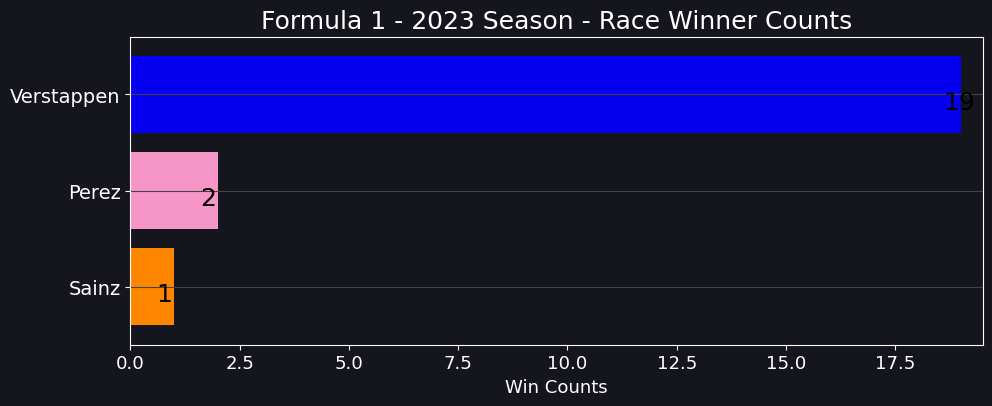

In [16]:
winnerCnt = winners['Driver'].value_counts()
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151e'
plt.rcParams['figure.facecolor'] = '#15151e'
plt.rcParams['grid.color'] = '#444444'
c = assign_color('drivers', winnerCnt.index)
plt.figure(figsize=(11, 4))
plt.barh([driver.split()[1] for driver in winnerCnt.index], winnerCnt.values, color=c)
for i in range(len(winnerCnt.values)):
    plt.text(winnerCnt.values[i] - 0.4, i + 0.15, winnerCnt.values[i], color='k', fontsize=18)
plt.axis([0, max(winnerCnt.values) + 0.5, len(winnerCnt) - 0.4, -0.6])
plt.title("Formula 1 - 2023 Season - Race Winner Counts", fontsize=18)
plt.xlabel("Win Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.show()


### How many hours we spent at least

In [17]:
totalTime = timedelta()
for time in winners['Time/Retired']:
    totalTime += timedelta(hours=int(time[0]), minutes=int(time[2:4]), seconds=int(time[5:7]), milliseconds=int(time[8:]))
print("TOTAL WINNERS RACE TIME: {} day {} hours {} minutes {} seconds".format(totalTime.days, totalTime.seconds//3600, 
                                                (totalTime.seconds-(totalTime.seconds//3600*3600))//60,
                                                (totalTime.seconds-(totalTime.seconds//3600*3600))%60 ) )

TOTAL WINNERS RACE TIME: 1 day 12 hours 4 minutes 11 seconds


### Pole Positions

In [18]:
polePos = raceResults[raceResults['Starting Grid'] == 1][['Track','Driver','Team','Position','Fastest Lap Time']].set_index('Track')
polePos.rename(columns={'Position':'Finish Position'}, inplace=True)
polePos

,Driver,Team,Finish Position,Fastest Lap Time
Track,,,,
Bahrain,Max Verstappen,Red Bull Racing Honda RBPT,1,1:36.236
Saudi Arabia,Sergio Perez,Red Bull Racing Honda RBPT,1,1:32.188
Australia,Max Verstappen,Red Bull Racing Honda RBPT,1,1:20.342
Azerbaijan,Charles Leclerc,Ferrari,3,1:44.561
Miami,Sergio Perez,Red Bull Racing Honda RBPT,2,1:30.560
Monaco,Max Verstappen,Red Bull Racing Honda RBPT,1,1:16.604
Spain,Max Verstappen,Red Bull Racing Honda RBPT,1,1:16.330
Canada,Max Verstappen,Red Bull Racing Honda RBPT,1,1:15.594
Austria,Max Verstappen,Red Bull Racing Honda RBPT,1,1:07.012


## Podium Finishes

### Podium Finish Counts (Driver)

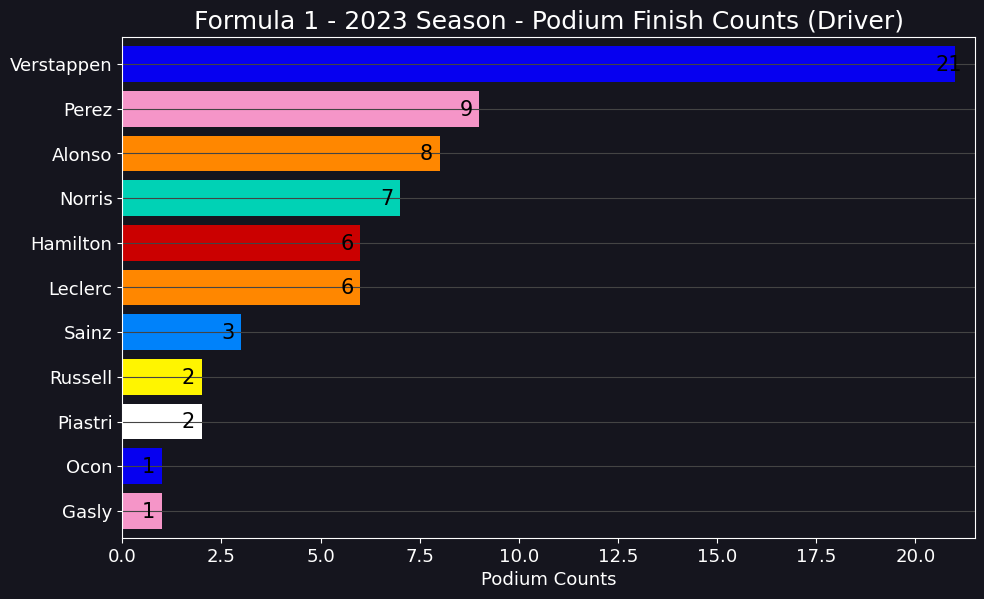

In [19]:
podiums = raceResults[raceResults['Position'].isin(['1','2','3'])]
podiumsCnt = podiums['Driver'].value_counts()
c = assign_color('drivers',podiumsCnt.index)
plt.figure(figsize=(11,6.5))
plt.barh([driver.split()[1] for driver in podiumsCnt.index], podiumsCnt.values, color=c)
for i in range(len(podiumsCnt.values)):
    plt.text(podiumsCnt.values[i]-0.5, i+0.15, podiumsCnt.values[i], color='k', fontsize=15)
plt.axis([0,max(podiumsCnt)+0.5,len(podiumsCnt)-0.4,-0.6])
plt.title("Formula 1 - 2023 Season - Podium Finish Counts (Driver)", fontsize=18)
plt.xlabel("Podium Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

### Podium Finish Counts (Team

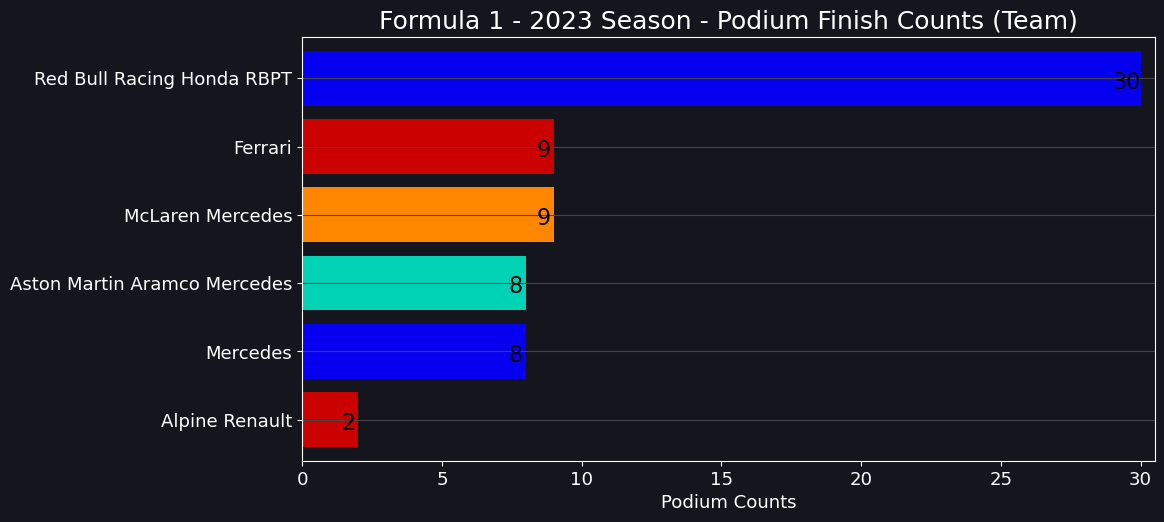

In [20]:
podiumsCntTeam = podiums['Team'].value_counts()
c = assign_color('teams',podiumsCntTeam.index)
plt.figure(figsize=(11,5.5))
plt.barh(podiumsCntTeam.index, podiumsCntTeam.values, color=c)
for i in range(len(podiumsCntTeam.values)):
    if podiumsCntTeam.values[i] >= 10:  sh = 1
    else:   sh = 0.6
    plt.text(podiumsCntTeam.values[i]-sh, i+0.15, podiumsCntTeam.values[i], color='k', fontsize=16)
plt.axis([0,max(podiumsCntTeam.values)+0.5,len(podiumsCntTeam)-0.4,-0.6])
plt.title("Formula 1 - 2023 Season - Podium Finish Counts (Team)", fontsize=18)
plt.xlabel("Podium Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

### Top 10 Finishes

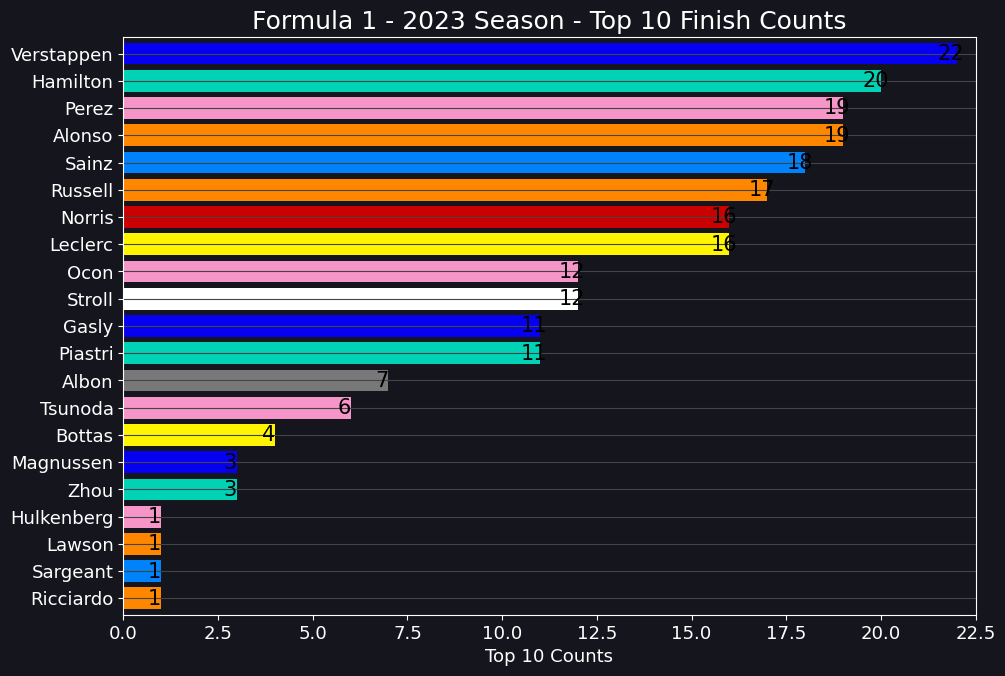

In [21]:
top10 = map(str, list(range(1,11)))
topTenFinishes = raceResults[raceResults['Position'].isin(top10)]['Driver'].value_counts()
c = assign_color('drivers',topTenFinishes.index)
plt.figure(figsize=(11,7.5))
plt.barh([driver.split()[1] for driver in topTenFinishes.index], topTenFinishes.values, color=c)
for i in range(len(topTenFinishes.values)):
    if topTenFinishes.values[i] >= 10:  sh = 0.5
    else:   sh = 0.35
    plt.text(topTenFinishes.values[i]-sh, i+0.23, topTenFinishes.values[i], color='k', fontsize=15)
plt.axis([0,max(topTenFinishes.values)+0.5,len(topTenFinishes)-0.4,-0.6])
plt.title("Formula 1 - 2023 Season - Top 10 Finish Counts", fontsize=18)
plt.xlabel("Top 10 Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

### DNF Analyses

In [22]:
DNF = raceResults[raceResults['Time/Retired'] == 'DNF']
print("Total of {} DNFs have occurred.".format(DNF.shape[0]))

Total of 60 DNFs have occurred.


### Grands Prix individually

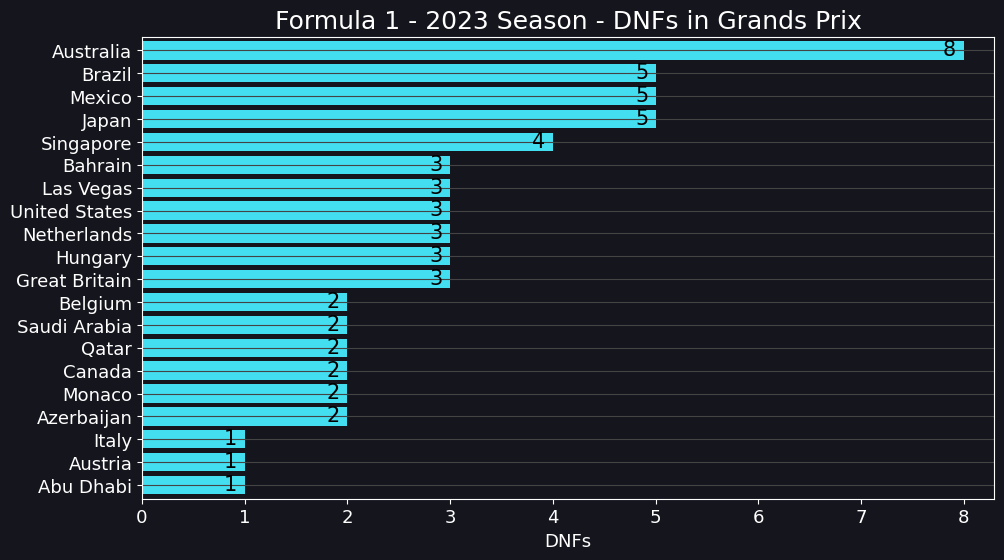

In [23]:
DNFtrack = DNF['Track'].value_counts()
plt.figure(figsize=(11,6))
plt.barh(DNFtrack.index, DNFtrack.values, color='#43def0')
for i in range(len(DNFtrack.values)):
    plt.text(DNFtrack.values[i]-0.2, i+0.23, DNFtrack.values[i], color='k', fontsize=15)
plt.axis([0,max(DNFtrack.values)+0.3,len(DNFtrack)-0.4,-0.6])
plt.title("Formula 1 - 2023 Season - DNFs in Grands Prix", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

In [24]:
raceResults[(raceResults['Track'] == 'Austria') & (raceResults['Time/Retired'] == 'DNF')] \
    [['Driver', 'Team', 'Laps']]

,Driver,Team,Laps
179,Nico Hulkenberg,Haas Ferrari,12


### In the second step, I'd like to get the DNF counts according to drivers:

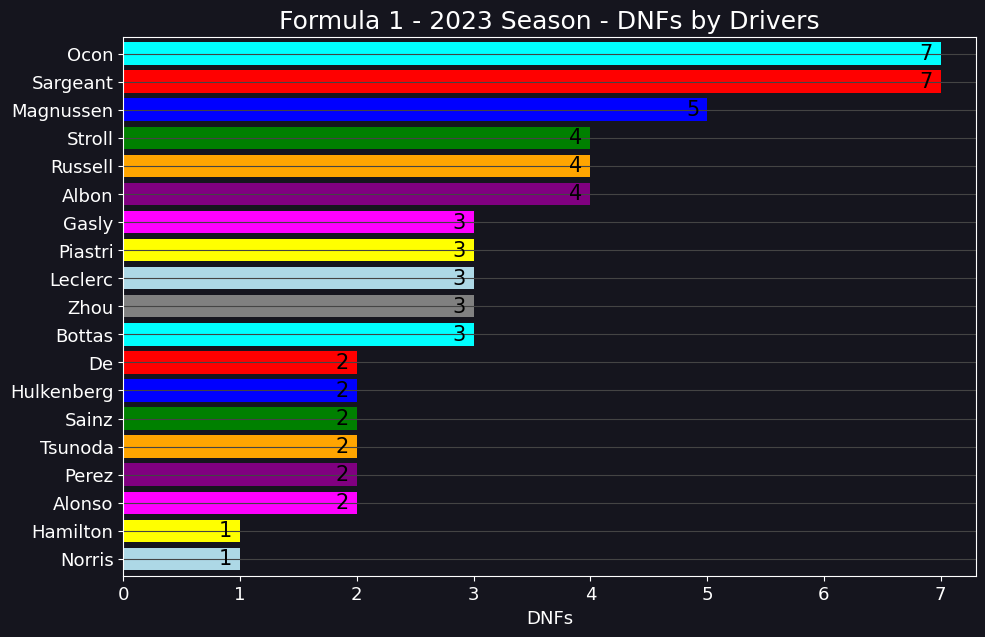

In [25]:
DNFdriver = DNF['Driver'].value_counts()
colors = ['cyan', 'red', 'blue', 'green', 'orange', 'purple', 'magenta', 'yellow', 'lightblue', 'gray']
plt.figure(figsize=(11, 7))
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver.values, color=colors[:len(DNFdriver)])
for i in range(len(DNFdriver.values)):
    plt.text(DNFdriver.values[i] - 0.18, i + 0.21, DNFdriver.values[i], color='k', fontsize=15)
plt.axis([0, max(DNFdriver.values) + 0.3, len(DNFdriver) - 0.4, -0.6])
plt.title("Formula 1 - 2023 Season - DNFs by Drivers", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

### In the third step, I'd like to get the DNF counts according to Teams:

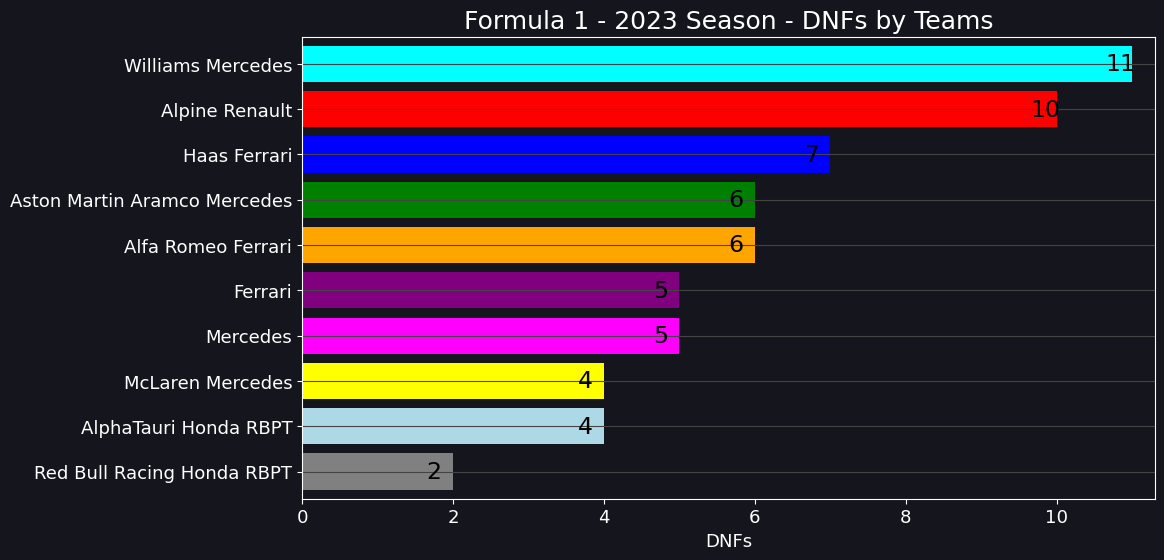

In [26]:
DNFteam = DNF['Team'].value_counts()
colors = ['cyan', 'red', 'blue', 'green', 'orange', 'purple', 'magenta', 'yellow', 'lightblue', 'gray']
c = colors[:len(DNFteam)]
plt.figure(figsize=(11, 6))
plt.barh(DNFteam.index, DNFteam.values, color=c)
for i in range(len(DNFteam.values)):
    plt.text(DNFteam.values[i] - 0.35, i + 0.15, DNFteam.values[i], color='k', fontsize=17)
plt.axis([0, max(DNFteam.values) + 0.3, len(DNFteam) - 0.4, -0.6])
plt.title("Formula 1 - 2023 Season - DNFs by Teams", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

In [27]:
raceResults[(raceResults['Team'] == 'Mercedes') & (raceResults['Time/Retired'] == 'DNF')] \
    [['Track', 'Driver', 'Team', 'Starting Grid']]

,Track,Driver,Team,Starting Grid
57,Australia,George Russell,Mercedes,2
158,Canada,George Russell,Mercedes,4
295,Singapore,George Russell,Mercedes,2
338,Qatar,Lewis Hamilton,Mercedes,3
394,Brazil,George Russell,Mercedes,8


In [28]:
raceResults[raceResults['Time/Retired'] == 'DNS'].loc[:,'Track':'Team'].set_index('Track')

,Position,No,Driver,Team
Track,,,,
Italy,NC,22,Yuki Tsunoda,AlphaTauri Honda RBPT
Singapore,NC,18,Lance Stroll,Aston Martin Aramco Mercedes
Qatar,NC,55,Carlos Sainz,Ferrari
Brazil,NC,16,Charles Leclerc,Ferrari


In [29]:
raceResults[(raceResults['Position'] != 'NC') & (raceResults['Time/Retired'] == 'DNF')] \
        .loc[:,'Track':'Laps'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps
Track,,,,,,
Australia,13,10,Pierre Gasly,Alpine Renault,9,56
Australia,14,31,Esteban Ocon,Alpine Renault,11,56
Australia,15,21,Nyck De Vries,AlphaTauri Honda RBPT,15,56
Australia,16,2,Logan Sargeant,Williams Mercedes,18,56
Australia,17,20,Kevin Magnussen,Haas Ferrari,14,52
Monaco,19,20,Kevin Magnussen,Haas Ferrari,17,70
Great Britain,18,10,Pierre Gasly,Alpine Renault,10,46
Hungary,18,2,Logan Sargeant,Williams Mercedes,20,67
Singapore,16,63,George Russell,Mercedes,2,61


### Drivers in Top 10 - Points Progression in 2023 Season

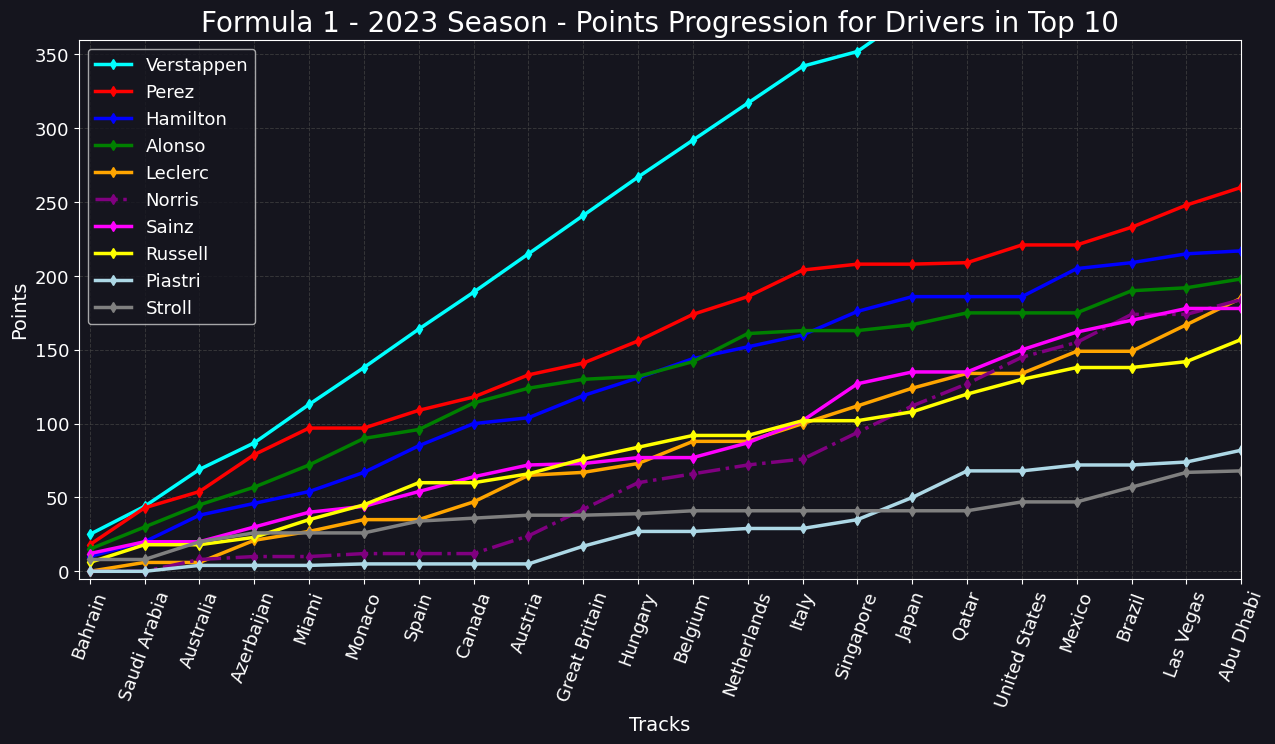

In [30]:
GPnames = raceResults['Track'].unique()
TopTenDrivers = driversSt.head(10)['Driver'].values
colors = ['cyan', 'red', 'blue', 'green', 'orange', 'purple', 'magenta', 'yellow', 'lightblue', 'gray']
color = colors[:len(TopTenDrivers)]
abbr = [driver.split()[1] for driver in TopTenDrivers]
plt.figure(figsize=(15,7))
for i in range(len(TopTenDrivers)):
    ptsPrg = raceResults[raceResults['Driver'] == TopTenDrivers[i]]['Points'].cumsum().values
    for j in range(len(GPnames)):
        if TopTenDrivers[i] not in raceResults[raceResults['Track'] == GPnames[j]]['Driver'].values:
            ptsPrg = np.insert(ptsPrg, j-1, ptsPrg[j-1])
    if abbr[i].upper()[0:3] in ['BOT','ALB','NOR']:
        plt.plot(ptsPrg, color=color[i], label=abbr[i], marker='d', markersize=5, linestyle='-.', linewidth=2.5)
    else:  plt.plot(ptsPrg, color=color[i], label=abbr[i], marker='d', markersize=5, linewidth=2.5)
plt.axis([-0.2,16.4,-5,360])
plt.title("Formula 1 - 2023 Season - Points Progression for Drivers in Top 10", fontsize=20)
plt.xlabel("Tracks", fontsize=14)
plt.xticks(range(len(GPnames)), GPnames, rotation=70, fontsize=13)
plt.ylabel("Points", fontsize=14)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

### Teams - Points Progression in 2023 Season

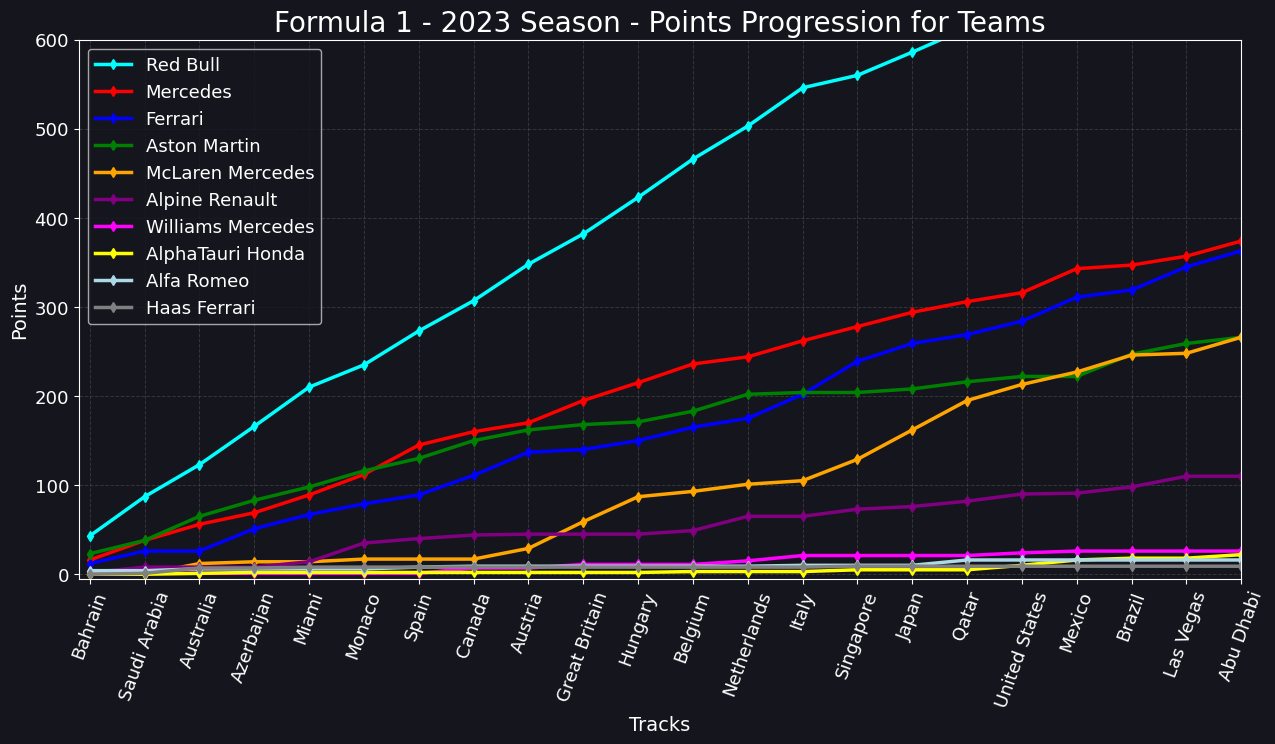

In [31]:
trackTeamPts = raceResults.groupby(['Track','Team'])['Points'].agg('sum')
if ('British Grand Prix', 'Red Bull Racing Honda RBPT') in trackTeamPts.index:
    trackTeamPts.loc[('British Grand Prix', 'Red Bull Racing Honda RBPT')] -= 15
trackOrder = raceResults['Track'].unique()
teamOrder = constructorsSt['Team'].unique()
colors = ['cyan', 'red', 'blue', 'green', 'orange', 'purple', 'magenta', 'yellow', 'lightblue', 'gray']
color = colors[:len(trackTeamPts)]
abbr = [" ".join(team.split()[0:2]) for team in teamOrder]
plt.figure(figsize=(15,7))
for i in range(len(teamOrder)):
    teamPts = []
    for j in range(len(trackOrder)):
        teamPts.append(trackTeamPts.loc[(trackOrder[j],teamOrder[i])])
    teamPts = np.array(teamPts).cumsum()
    plt.plot(teamPts, color=color[i], label=abbr[i], marker='d', markersize=5, linewidth=2.5)
plt.title("Formula 1 - 2023 Season - Points Progression for Teams", fontsize=20)
plt.axis([-0.2,16.4,-5,600])
plt.xlabel('Tracks', fontsize=14)
plt.xticks(range(len(trackOrder)), trackOrder, rotation=70, fontsize=13)
plt.ylabel('Points', fontsize=14)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

### Drivers in Top 10 - Race Finish Positions in 2023 Season

Number of drivers: 21
Number of colors: 21


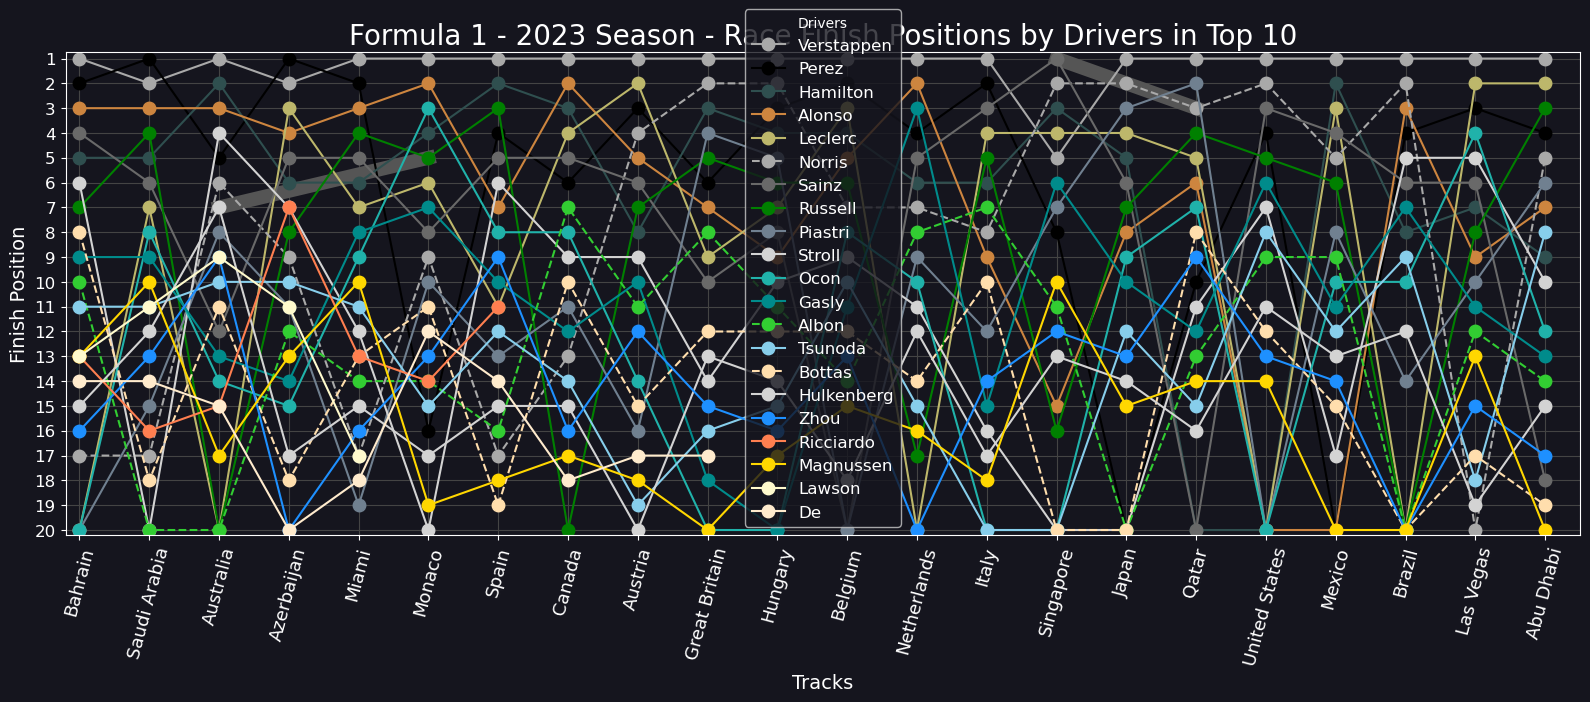

In [32]:
from matplotlib.colors import CSS4_COLORS
def assign_color(category, items):
    color_list = list(CSS4_COLORS.values())
    np.random.seed(0)  # For reproducible results
    np.random.shuffle(color_list)
    return color_list[:len(items)]
finishPos = raceResults[['Track', 'Driver', 'Position']].copy()
finishPos['Position'] = finishPos['Position'].replace({'NC': 20, 'DQ': 20}).astype(float)
driverOrder = driversSt['Driver'].unique() 
color = assign_color('drivers', driverOrder)  
print(f"Number of drivers: {len(driverOrder)}")
print(f"Number of colors: {len(color)}")
plt.figure(figsize=(16, 7))
plt.axis([-0.2, len(trackOrder) - 0.5, 20.2, 0.75])  
plt.plot([2, 5], [7, 5], color='#555555', linewidth=10)
plt.plot([14, 16], [1, 3], color='#555555', linewidth=10)
for i, driver in enumerate(driverOrder):
    driverPos = finishPos[finishPos['Driver'] == driver]['Position'].values
    abbr = driver.split()[1].upper()[:3]
    if abbr == 'HAM' and len(driverPos) < 16:
        driverPos = np.insert(driverPos, 15, np.nan)
    if abbr == 'PER' and len(driverPos) < 5:
        driverPos = np.insert(driverPos, 3, [np.nan, np.nan])
    trackOrder_adjusted = trackOrder[:len(driverPos)]
    if len(trackOrder_adjusted) != len(driverPos):
        print(f"Warning: Length mismatch for {driver} - Tracks: {len(trackOrder_adjusted)}, Positions: {len(driverPos)}")
        continue  
    plt.plot(trackOrder_adjusted, driverPos, color=color[i], marker='o', markersize=9,
             linestyle='--' if abbr in ['BOT', 'ALB', 'NOR'] else '-', label=driver.split()[1])
plt.title("Formula 1 - 2023 Season - Race Finish Positions by Drivers in Top 10", fontsize=20)
plt.xlabel('Tracks', fontsize=14)
plt.xticks(rotation=75, fontsize=13)
plt.ylabel('Finish Position', fontsize=14)
plt.yticks(range(1, 21), fontsize=12)
plt.legend(title='Drivers', fontsize=12)
plt.grid(True)
plt.tight_layout()  
plt.show()

### Laps and Distances Driven by Drivers

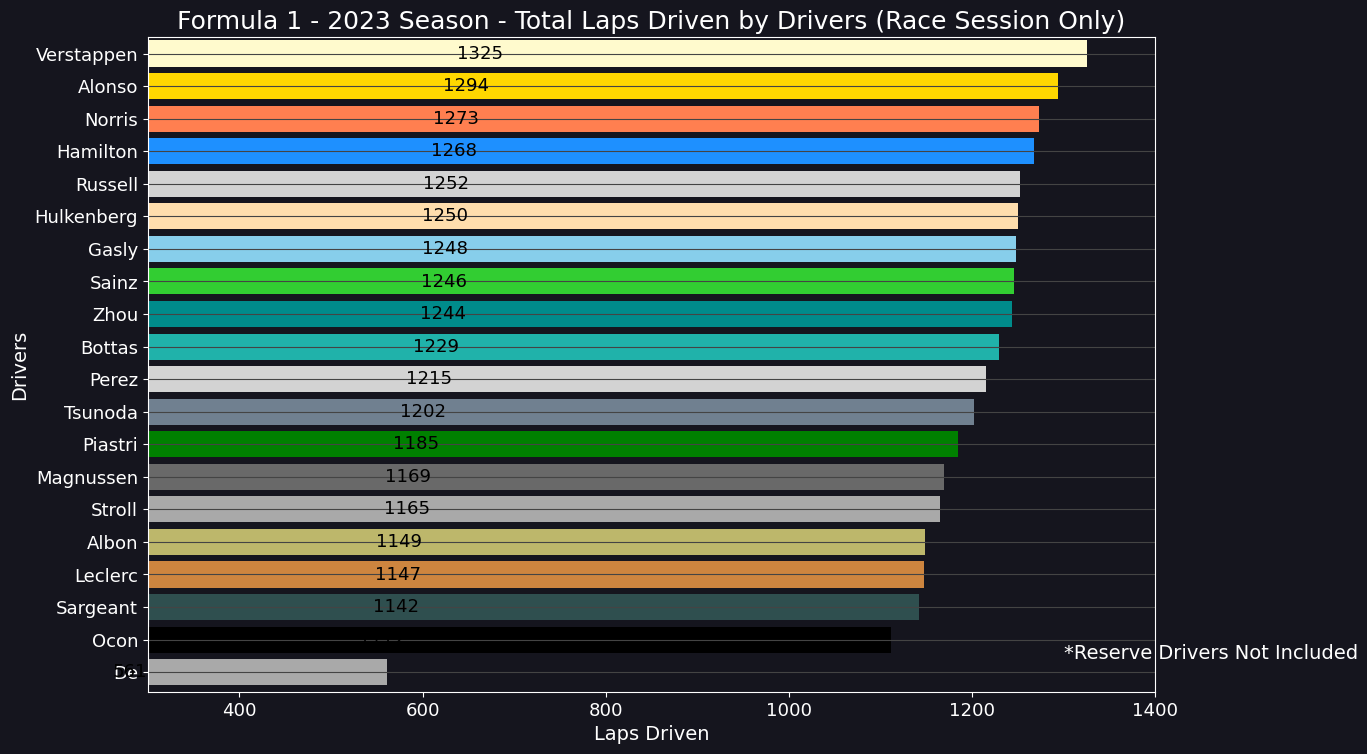

In [33]:
driverLaps = raceResults.groupby(['Driver'])['Laps'].sum().sort_values().tail(20)
c = assign_color('drivers', driverLaps.index)
abbr = [driver.split()[1] for driver in driverLaps.index]
plt.figure(figsize=(13, 8.5))
plt.barh(driverLaps.index, driverLaps, color=c)
plt.axis([300, 1400, -0.6, 19.5])
for i in range(len(driverLaps)):
    plt.text(driverLaps.iloc[i] / 2, i, driverLaps.iloc[i], fontsize=13, color='k', ha='center', va='center')
plt.text(1300, 0.4, "*Reserve Drivers Not Included", fontsize=14)
plt.title("Formula 1 - 2023 Season - Total Laps Driven by Drivers (Race Session Only)", fontsize=18)
plt.xlabel('Laps Driven', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Drivers', fontsize=14)
plt.yticks(range(20), abbr, fontsize=13)
plt.grid(axis='y')
plt.show()

### Estimated distance driven

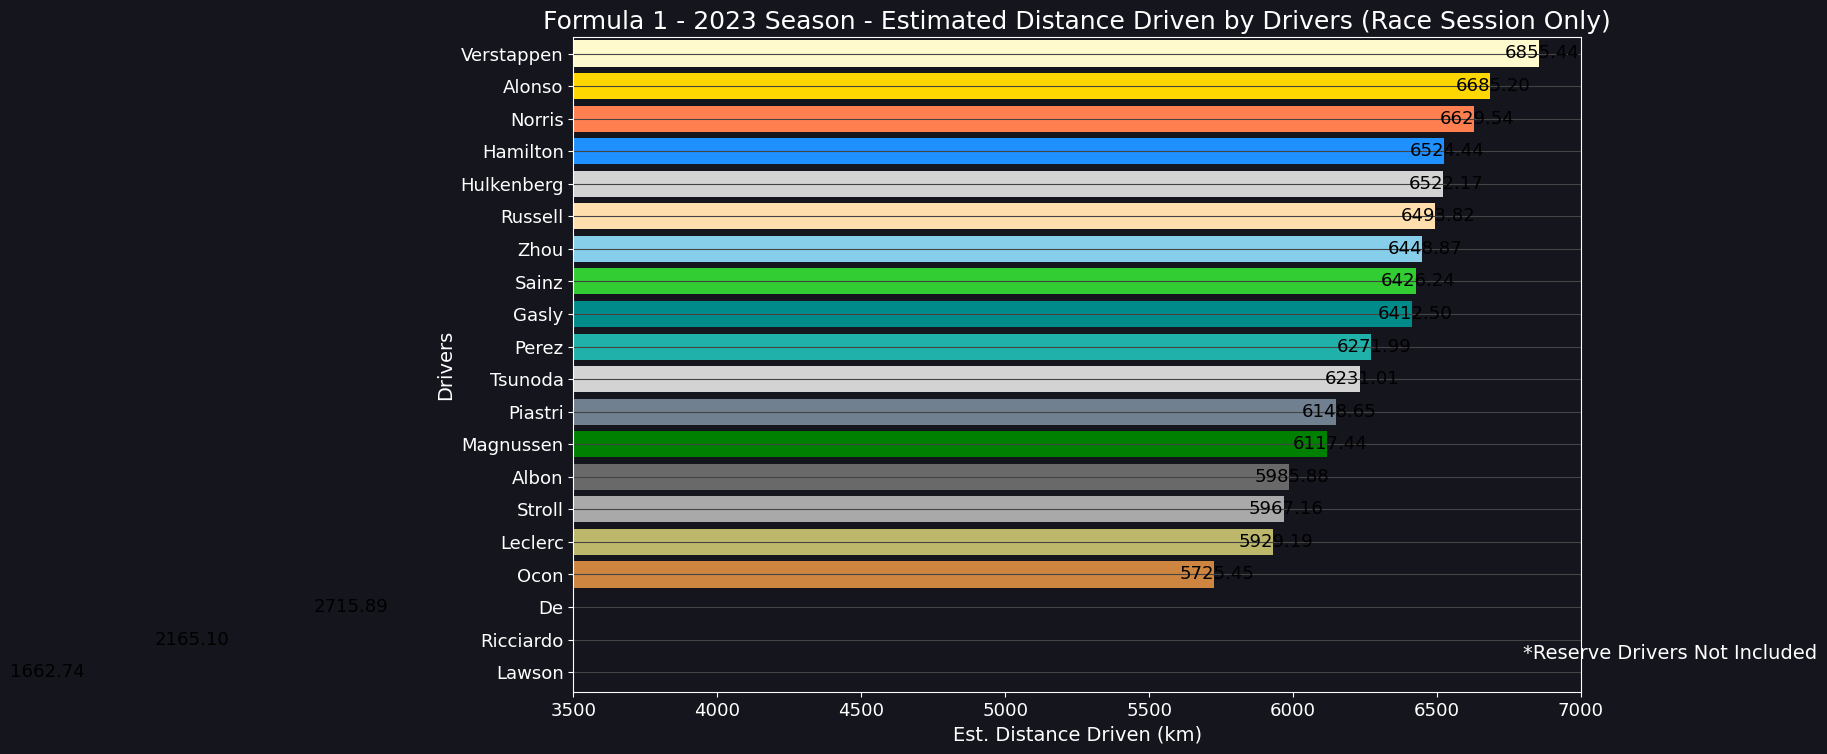

In [34]:
circuitLenOrder = calendar['Circuit Length(km)'].values
driverLaps = raceResults.groupby(['Driver', 'Track'])['Laps'].sum().reset_index()
driverOrder = driversSt['Driver'].unique()
indexes_to_delete = [14, 21, 22]
indexes_to_delete = [i for i in indexes_to_delete if i < len(driverOrder)]
driverOrder = np.delete(driverOrder, indexes_to_delete)
trackOrder = raceResults['Track'].unique()
if len(trackOrder) < len(circuitLenOrder):
    circuitLenOrder = circuitLenOrder[:len(trackOrder)]
elif len(trackOrder) > len(circuitLenOrder):
    trackOrder = trackOrder[:len(circuitLenOrder)]
driverTotDist = np.array([])
for i in range(len(driverOrder)):
    dlaps = np.zeros(len(trackOrder))
    for j in range(len(trackOrder)):
        dl = driverLaps.loc[(driverLaps['Driver'] == driverOrder[i]) & (driverLaps['Track'] == trackOrder[j])]['Laps'].tolist()
        if len(dl) != 0:
            dlaps[j] = dl[0]
    driverTotDist = np.append(driverTotDist, sum(dlaps * circuitLenOrder))
driverTotDist = pd.Series(driverTotDist, index=driverOrder).sort_values()
c = assign_color('drivers', driverTotDist.index)
plt.figure(figsize=(13, 8.5))
plt.axis([3500, 7000, -0.6, 19.5])  
plt.barh([driver.split()[1] for driver in driverTotDist.index], driverTotDist, color=c)
for i in range(len(driverTotDist)):
    plt.text(driverTotDist.iloc[i] - 120, i - 0.15, "{:6.2f}".format(driverTotDist.iloc[i]), color='k', fontsize=13)
plt.text(6800, 0.4, "*Reserve Drivers Not Included", fontsize=14)
plt.title("Formula 1 - 2023 Season - Estimated Distance Driven by Drivers (Race Session Only)", fontsize=18)
plt.xlabel('Est. Distance Driven (km)', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Drivers', fontsize=14)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()